In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 1
timesteps =100
x_m = 50
x = np.arange(0.,x_m + x_m/2. + dx,dx, dtype='int64')
Nx = len(x)
u = [[0 for i in range(timesteps)] for j in range(Nx)]
U = []
#f_plus = [[0 for i in range(timesteps)] for j in range(Nx)]
#f_min = [[0 for i in range(timesteps)] for j in range(Nx)]

In [3]:
#initial conditions
for  j in range(len(x)):
        if x[j] <= 0:
            ux0 = 1
            u[j][0]=(ux0)
                

        elif x[j]> 0:
            ux0 = -0.5
            u[j][0]=(ux0)

In [4]:
def minmod(a,b):
    sign = (np.sign(a)+np.sign(b))
    minmod = sign/2*(min(np.abs(a), np.abs(b)))
    
    return minmod
def h(a,c):
    if a<=c:
        u_min = min(a,c)
        h = u_min+(1/2)*u_min*u_min
    elif a>c:
        u_max = max(a,c)
        h = u_max+(1/2)*u_max*u_max
    return h
def L(a,b):
    L=(1/dx)*(a-b)
    return L

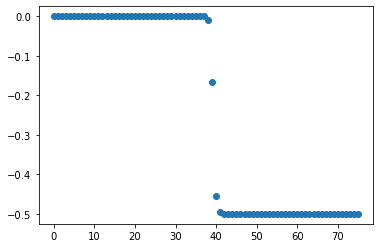

In [5]:
for n in range(0, timesteps-1):
    deltat = (dx/2)*np.amax(np.abs(u))
    #print("n=",n)
    for  j in range(Nx):
        #print("j=", j)
        
        if j+(2) > x_m:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(-0.5-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = -0.5-1/2*minmod((0-u[j][n]),(-0.5-(-0.5)))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-u[j-2][n]),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(-0.5-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        elif j == 0:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-0),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = 0+1/2*minmod((0),(u[j][n]-0))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-0),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        elif j == 1:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-0),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        else:  
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-u[j-2][n]),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
            
            
        # calculate f
        f_plus = h(u_min_up, u_plus_up)
        #print("f_plus = ", f_plus)
        f_min = h(u_min_down, u_plus_down)
        #print("f_min = ", f_plus)
        
        #print("f_min = ", f_min)
        #print("j=", j)
        #if n == 0:
        #    Lis = L(f_plus, f_min)
        #    print("L =", Lis)
        #    unplus = u[j][n]+deltat*Lis #equation 2.4 part 1
        
        unplus=u[j][n]-(deltat)*L(f_plus, f_min) #equation 1.10
        #else: 
        #    Lis = L(f_plus, f_min)
        #    print("L =", Lis)
        #    unplus = u[j][n]+(1/2)*deltat*Lis#+(1/2)*deltat*L(f_plus[j][n-1], f_min[j][n-1])
        
        u[j][n+1]=unplus
        #print("un+1= ", unplus)
        
        if n == timesteps-2:
            U.append(u[j][n])
            #print("j = ", j , "u = ", U[j])
        
plt.scatter(x,U)

plt.show()

In [ ]:
for n in range(0, timesteps-1):
    deltat = (dx/2)*np.amax(np.abs(u))
    #print("n=",n)
    for  j in range(Nx):
        #print("j=", j)
        
        if j+(2) > x_m:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(-0.5-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = -0.5-1/2*minmod((0-u[j][n]),(-0.5-(-0.5)))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-u[j-2][n]),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(-0.5-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        elif j == 0:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-0),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = 0+1/2*minmod((0),(u[j][n]-0))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-0),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        elif j == 1:
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-0),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
        else:  
            # calculate j+1/2 index
            u_min_up = u[j][n]+1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_min_up=", u_min_up)
            
            u_plus_up = u[j+1][n]-1/2*minmod((u[j+1][n]-u[j][n]),(u[j+2][n]-u[j+1][n]))                
            #print("u_plus_up=", u_plus_up)
            
            # calculate j-1/2 index                                   
            u_min_down = u[j-1][n]+1/2*minmod((u[j-1][n]-u[j-2][n]),(u[j][n]-u[j-1][n]))
            #print("u_min_down=", u_min_down)
            
            u_plus_down = u[j][n]-1/2*minmod((u[j][n]-u[j-1][n]),(u[j+1][n]-u[j][n]))
            #print("u_plus_down=", u_plus_down)
            
            
        # calculate f
        f_plus = h(u_min_up, u_plus_up)
        #print("f_plus = ", f_plus)
        f_min = h(u_min_down, u_plus_down)
        #print("f_min = ", f_plus)
        
        #print("f_min = ", f_min)
        #print("j=", j)
        if n == 0:
            Lis = L(f_plus, f_min)
        #    print("L =", Lis)
            unplus = u[j][n]+deltat*Lis #equation 2.4 part 1
        
        #unplus=u[j][n]-(deltat)*L(f_plus, f_min) #equation 1.10
        else: 
            Lis = L(f_plus, f_min)
        #    print("L =", Lis)
            unplus = u[j][n]+(1/2)*deltat*Lis+(1/2)*deltat*L(f_plus[j][n-1], f_min[j][n-1])
        
        u[j][n+1]=unplus
        #print("un+1= ", unplus)
        
        if n == timesteps-2:
            U.append(u[j][n])
            #print("j = ", j , "u = ", U[j])
        
plt.scatter(x,U)

plt.show()